In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap, TimestampedGeoJson
import matplotlib.pyplot as plt
from random import sample
from folium import TileLayer


In [ ]:

data=pd.read_csv('/content/NYPD_Complaint_Data_Current_(Year_To_Date)_20260110.csv')

In [ ]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,303250435,13,MANHATTAN,03/20/2025,00:30:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,WHITE,M,988886,207857,"40,73720309857","-73,98327259815","(40.7372030985741, -73.9832725981497)",POINT (-73.9832725981497 40.7372030985741)
1,312320890,46,BRONX,09/03/2025,22:06:00,09/03/2025,22:16:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,0,0,0,0,"(0.0, 0.0)",POINT (0 0)
2,307271594,47,BRONX,03/05/2025,17:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,1026480,262584,"40,88731363447","-73,84727175776","(40.8873136344706, -73.8472717577564)",POINT (-73.8472717577564 40.8873136344706)
3,299744592,121,STATEN ISLAND,01/20/2025,18:30:00,01/20/2025,18:35:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,938881,167697,"40,626859","-74,16344","(40.626859, -74.16344)",POINT (-74.16344 40.626859)
4,309582473,121,STATEN ISLAND,07/12/2025,20:45:00,07/12/2025,21:00:00,COMPLETED,(null),NaN,...,NaN,25-44,WHITE,F,944834,161146,"40,608906","-74,141958","(40.608906, -74.141958)",POINT (-74.141958 40.608906)


In [ ]:
data.describe()

,ADDR_PCT_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,PD_CD,TRANSIT_DISTRICT,X_COORD_CD,Y_COORD_CD
count,438556.000000,27186.000000,438556.000000,438556.000000,438313.000000,26258.000000,4.385560e+05,438556.000000
mean,63.516265,10976.441772,0.521664,302.756337,429.627718,16.645251,9.990156e+05,206612.516823
std,34.940599,21578.842193,4.656181,159.068140,233.599434,12.914274,8.430337e+04,34518.149918
min,1.000000,218.000000,0.000000,101.000000,100.000000,1.000000,0.000000e+00,0.000000
25%,40.000000,477.000000,0.000000,118.000000,259.000000,3.000000,9.912020e+05,184894.000000
50%,62.000000,741.000000,0.000000,341.000000,397.000000,12.000000,1.005020e+06,206948.000000
75%,101.000000,3924.000000,0.000000,351.000000,638.000000,32.000000,1.017823e+06,235814.000000
max,123.000000,73862.000000,97.000000,678.000000,922.000000,34.000000,1.067185e+06,271819.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438556 entries, 0 to 438555
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                438556 non-null  object 
 1   ADDR_PCT_CD               438556 non-null  int64  
 2   BORO_NM                   438556 non-null  object 
 3   CMPLNT_FR_DT              438556 non-null  object 
 4   CMPLNT_FR_TM              438556 non-null  object 
 5   CMPLNT_TO_DT              418228 non-null  object 
 6   CMPLNT_TO_TM              438556 non-null  object 
 7   CRM_ATPT_CPTD_CD          438556 non-null  object 
 8   HADEVELOPT                438556 non-null  object 
 9   HOUSING_PSA               27186 non-null   float64
 10  JURISDICTION_CODE         438556 non-null  int64  
 11  JURIS_DESC                438556 non-null  object 
 12  KY_CD                     438556 non-null  int64  
 13  LAW_CAT_CD                438556 non-null  o

In [ ]:
data.isna().sum()


,0
CMPLNT_NUM,0
ADDR_PCT_CD,0
BORO_NM,0
CMPLNT_FR_DT,0
CMPLNT_FR_TM,0
CMPLNT_TO_DT,20328
CMPLNT_TO_TM,0
CRM_ATPT_CPTD_CD,0
HADEVELOPT,0
HOUSING_PSA,411370


# DATA CLEANING

In [ ]:
for column in data.columns:
    print(column,'have ',(data[column].isna().sum()*100/len(data)),' % missing values')

CMPLNT_NUM have  0.0  % missing values
ADDR_PCT_CD have  0.0  % missing values
BORO_NM have  0.0  % missing values
CMPLNT_FR_DT have  0.0  % missing values
CMPLNT_FR_TM have  0.0  % missing values
CMPLNT_TO_DT have  4.63521192276471  % missing values
CMPLNT_TO_TM have  0.0  % missing values
CRM_ATPT_CPTD_CD have  0.0  % missing values
HADEVELOPT have  0.0  % missing values
HOUSING_PSA have  93.80101971013964  % missing values
JURISDICTION_CODE have  0.0  % missing values
JURIS_DESC have  0.0  % missing values
KY_CD have  0.0  % missing values
LAW_CAT_CD have  0.0  % missing values
LOC_OF_OCCUR_DESC have  0.0  % missing values
OFNS_DESC have  0.0  % missing values
PARKS_NM have  0.0  % missing values
PATROL_BORO have  0.0  % missing values
PD_CD have  0.055409115369530915  % missing values
PD_DESC have  0.0  % missing values
PREM_TYP_DESC have  0.0  % missing values
RPT_DT have  0.0  % missing values
STATION_NAME have  0.0  % missing values
SUSP_AGE_GROUP have  0.0  % missing values
SUS

Drop columns with many missing values

TRANSIT_DISTRICT and HOUSING_PSA have many null values so we need to drop them

In [ ]:
data.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
data.drop(columns=['HOUSING_PSA','TRANSIT_DISTRICT'],inplace=True)
data.drop(columns='PATROL_BORO',inplace = True)
data.drop(columns=['KY_CD','RPT_DT','PD_DESC','PD_CD'],inplace=True)

**handling other columns with many nulls**

In [ ]:
data.loc[data['PARKS_NM'].notnull(),'PARKS_NM'] = 1
data.loc[data['PARKS_NM'].isna(),'PARKS_NM'] = 0

data.loc[data['HADEVELOPT'].notnull(),'HADEVELOPT'] = 1
data.loc[data['HADEVELOPT'].isna(),'HADEVELOPT'] = 0

data.loc[data['STATION_NAME'].notnull(),'STATION_NAME'] = 1
data.loc[data['STATION_NAME'].isna(),'STATION_NAME'] = 0

data = data.rename({'PARKS_NM':'IN_PARK','HADEVELOPT':'IN_PUBLIC_HOUSING','STATION_NAME':'IN_STATION'}, axis=1)


In [ ]:
data.drop(columns=['X_COORD_CD','Y_COORD_CD',"Lat_Lon"],inplace=True)

In [ ]:
#we need also to drop rows that don't have coordinates
data = data[data['Latitude'].notna()]
data = data[data['Longitude'].notna()]

In [ ]:
if all(data['CMPLNT_FR_DT'].notna() == data['CMPLNT_TO_DT'].notna()):
    data.drop(columns='CMPLNT_TO_DT',inplace = True)

In [ ]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,IN_PUBLIC_HOUSING,JURISDICTION_CODE,...,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,New Georeferenced Column
0,303250435,13,MANHATTAN,03/20/2025,00:30:00,NaN,(null),COMPLETED,1,0,...,1,UNKNOWN,BLACK,M,25-44,WHITE,M,"40,73720309857","-73,98327259815",POINT (-73.9832725981497 40.7372030985741)
1,312320890,46,BRONX,09/03/2025,22:06:00,09/03/2025,22:16:00,COMPLETED,1,0,...,1,45-64,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,E,0,0,POINT (0 0)
2,307271594,47,BRONX,03/05/2025,17:00:00,NaN,(null),COMPLETED,1,0,...,1,25-44,BLACK,M,25-44,BLACK,F,"40,88731363447","-73,84727175776",POINT (-73.8472717577564 40.8873136344706)
3,299744592,121,STATEN ISLAND,01/20/2025,18:30:00,01/20/2025,18:35:00,COMPLETED,1,0,...,1,UNKNOWN,BLACK HISPANIC,M,UNKNOWN,UNKNOWN,D,"40,626859","-74,16344",POINT (-74.16344 40.626859)
4,309582473,121,STATEN ISLAND,07/12/2025,20:45:00,07/12/2025,21:00:00,COMPLETED,1,0,...,1,UNKNOWN,WHITE,M,25-44,WHITE,F,"40,608906","-74,141958",POINT (-74.141958 40.608906)


In [ ]:
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], errors='coerce')
data['CMPLNT_TO_DT'] = pd.to_datetime(data['CMPLNT_TO_DT'], errors='coerce')
data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], errors='coerce')


#drop rows when we don't have a date or a time of the incident
data = data[data['CMPLNT_FR_DT'].notna()]
data = data[data['CMPLNT_FR_TM'].notna()]
# new variables
data['year'] = data['CMPLNT_FR_DT'].dt.year
data['month'] = data['CMPLNT_FR_DT'].dt.month
data['day'] = data['CMPLNT_FR_DT'].dt.day
data['hour'] = data['CMPLNT_FR_TM'].dt.hour
# add week day column
data['weekday'] = pd.to_datetime(data['CMPLNT_FR_DT']).dt.day_name()

# we no more need those columns
data.drop(columns='CMPLNT_FR_DT', inplace=True)
data.drop(columns='CMPLNT_FR_TM', inplace=True)
data.drop(columns='CMPLNT_TO_TM', inplace=True)
data.drop(columns='CMPLNT_TO_DT', inplace=True)


/tmp/ipython-input-4069169548.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], errors='coerce')
/tmp/ipython-input-4069169548.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], errors='coerce')


In [ ]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CRM_ATPT_CPTD_CD,IN_PUBLIC_HOUSING,JURISDICTION_CODE,JURIS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,...,VIC_RACE,VIC_SEX,Latitude,Longitude,New Georeferenced Column,year,month,day,hour,weekday
0,303250435,13,MANHATTAN,COMPLETED,1,0,N.Y. POLICE DEPT,FELONY,INSIDE,RAPE,...,WHITE,M,"40,73720309857","-73,98327259815",POINT (-73.9832725981497 40.7372030985741),2025,3,20,0,Thursday
1,312320890,46,BRONX,COMPLETED,1,0,N.Y. POLICE DEPT,MISDEMEANOR,(null),DANGEROUS DRUGS,...,UNKNOWN,E,0,0,POINT (0 0),2025,9,3,22,Wednesday
2,307271594,47,BRONX,COMPLETED,1,0,N.Y. POLICE DEPT,FELONY,INSIDE,RAPE,...,BLACK,F,"40,88731363447","-73,84727175776",POINT (-73.8472717577564 40.8873136344706),2025,3,5,17,Wednesday
3,299744592,121,STATEN ISLAND,COMPLETED,1,0,N.Y. POLICE DEPT,FELONY,INSIDE,GRAND LARCENY,...,UNKNOWN,D,"40,626859","-74,16344",POINT (-74.16344 40.626859),2025,1,20,18,Monday
4,309582473,121,STATEN ISLAND,COMPLETED,1,0,N.Y. POLICE DEPT,VIOLATION,FRONT OF,HARRASSMENT 2,...,WHITE,F,"40,608906","-74,141958",POINT (-74.141958 40.608906),2025,7,12,20,Saturday


In [ ]:
for i in data.columns:
  print(i,data[i].isnull().sum())

CMPLNT_NUM 0
ADDR_PCT_CD 0
BORO_NM 0
CRM_ATPT_CPTD_CD 0
IN_PUBLIC_HOUSING 0
JURISDICTION_CODE 0
JURIS_DESC 0
LAW_CAT_CD 0
LOC_OF_OCCUR_DESC 0
OFNS_DESC 0
IN_PARK 0
PREM_TYP_DESC 0
IN_STATION 0
SUSP_AGE_GROUP 0
SUSP_RACE 0
SUSP_SEX 0
VIC_AGE_GROUP 0
VIC_RACE 0
VIC_SEX 0
Latitude 0
Longitude 0
New Georeferenced Column 0
year 0
month 0
day 0
hour 0
weekday 0


**clean suspect and victim data**

In [ ]:
data['SUSP_RACE'] = data['SUSP_RACE'].fillna('UNKNOWN')
data['VIC_RACE'] = data['VIC_RACE'].fillna('UNKNOWN')

data['SUSP_SEX'] = data['SUSP_SEX'].fillna('U')
data['VIC_SEX'] = data['VIC_SEX'].fillna('U')

In [ ]:
# take care of unvalid age data
valid_age = ['UNKNOWN', '25-44', '<18', '45-64', '65+', '18-24']
data.loc[~data['SUSP_AGE_GROUP'].isin(valid_age),'SUSP_AGE_GROUP'] = 'UNKNOWN'
data.loc[~data['VIC_AGE_GROUP'].isin(valid_age),'VIC_AGE_GROUP'] = 'UNKNOWN'

In [ ]:
data['BORO_NM'] = data['BORO_NM'].fillna('UNKNOWN')


In [ ]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CRM_ATPT_CPTD_CD,IN_PUBLIC_HOUSING,JURISDICTION_CODE,JURIS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,...,VIC_RACE,VIC_SEX,Latitude,Longitude,New Georeferenced Column,year,month,day,hour,weekday
0,303250435,13,MANHATTAN,COMPLETED,1,0,N.Y. POLICE DEPT,FELONY,INSIDE,RAPE,...,WHITE,M,"40,73720309857","-73,98327259815",POINT (-73.9832725981497 40.7372030985741),2025,3,20,0,Thursday
1,312320890,46,BRONX,COMPLETED,1,0,N.Y. POLICE DEPT,MISDEMEANOR,(null),DANGEROUS DRUGS,...,UNKNOWN,E,0,0,POINT (0 0),2025,9,3,22,Wednesday
2,307271594,47,BRONX,COMPLETED,1,0,N.Y. POLICE DEPT,FELONY,INSIDE,RAPE,...,BLACK,F,"40,88731363447","-73,84727175776",POINT (-73.8472717577564 40.8873136344706),2025,3,5,17,Wednesday
3,299744592,121,STATEN ISLAND,COMPLETED,1,0,N.Y. POLICE DEPT,FELONY,INSIDE,GRAND LARCENY,...,UNKNOWN,D,"40,626859","-74,16344",POINT (-74.16344 40.626859),2025,1,20,18,Monday
4,309582473,121,STATEN ISLAND,COMPLETED,1,0,N.Y. POLICE DEPT,VIOLATION,FRONT OF,HARRASSMENT 2,...,WHITE,F,"40,608906","-74,141958",POINT (-74.141958 40.608906),2025,7,12,20,Saturday


In [ ]:
data.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

In [ ]:
for i in data.columns:
  print(i,data[i].isnull().sum())
print(len(data))

CMPLNT_NUM 0
ADDR_PCT_CD 0
BORO_NM 0
CRM_ATPT_CPTD_CD 0
IN_PUBLIC_HOUSING 0
JURISDICTION_CODE 0
JURIS_DESC 0
LAW_CAT_CD 0
LOC_OF_OCCUR_DESC 0
OFNS_DESC 0
IN_PARK 0
PREM_TYP_DESC 0
IN_STATION 0
SUSP_AGE_GROUP 0
SUSP_RACE 0
SUSP_SEX 0
VIC_AGE_GROUP 0
VIC_RACE 0
VIC_SEX 0
Latitude 0
Longitude 0
New Georeferenced Column 0
year 0
month 0
day 0
hour 0
weekday 0
438551


In [ ]:
data.dropna(inplace=True)
len(data)

438551


**Renaming and clearing data columns**


In [ ]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CRM_ATPT_CPTD_CD,IN_PUBLIC_HOUSING,JURISDICTION_CODE,JURIS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,...,VIC_RACE,VIC_SEX,Latitude,Longitude,New Georeferenced Column,year,month,day,hour,weekday
0,303250435,13,MANHATTAN,COMPLETED,1,0,N.Y. POLICE DEPT,FELONY,INSIDE,RAPE,...,WHITE,M,"40,73720309857","-73,98327259815",POINT (-73.9832725981497 40.7372030985741),2025,3,20,0,Thursday
1,312320890,46,BRONX,COMPLETED,1,0,N.Y. POLICE DEPT,MISDEMEANOR,(null),DANGEROUS DRUGS,...,UNKNOWN,E,0,0,POINT (0 0),2025,9,3,22,Wednesday
2,307271594,47,BRONX,COMPLETED,1,0,N.Y. POLICE DEPT,FELONY,INSIDE,RAPE,...,BLACK,F,"40,88731363447","-73,84727175776",POINT (-73.8472717577564 40.8873136344706),2025,3,5,17,Wednesday
3,299744592,121,STATEN ISLAND,COMPLETED,1,0,N.Y. POLICE DEPT,FELONY,INSIDE,GRAND LARCENY,...,UNKNOWN,D,"40,626859","-74,16344",POINT (-74.16344 40.626859),2025,1,20,18,Monday
4,309582473,121,STATEN ISLAND,COMPLETED,1,0,N.Y. POLICE DEPT,VIOLATION,FRONT OF,HARRASSMENT 2,...,WHITE,F,"40,608906","-74,141958",POINT (-74.141958 40.608906),2025,7,12,20,Saturday


In [ ]:
data.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CRM_ATPT_CPTD_CD',
       'IN_PUBLIC_HOUSING', 'JURISDICTION_CODE', 'JURIS_DESC', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'IN_PARK', 'PREM_TYP_DESC',
       'IN_STATION', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude', 'Longitude',
       'New Georeferenced Column', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [ ]:
data.LOC_OF_OCCUR_DESC.value_counts()

,count
LOC_OF_OCCUR_DESC,
INSIDE,218054
FRONT OF,107146
(null),99529
OPPOSITE OF,7753
REAR OF,5900
OUTSIDE,169


In [ ]:
data.LAW_CAT_CD.value_counts()

,count
LAW_CAT_CD,
MISDEMEANOR,227673
FELONY,142014
VIOLATION,68864


In [ ]:
data = data.rename({'LAW_CAT_CD':'CRIME_CLASS'},axis = 1)
data = data.rename({'LOC_OF_OCCUR_DESC':'OCCURENCE'},axis = 1)
data = data.rename({'CRM_ATPT_CPTD_CD':'COMPLETED'},axis = 1)

In [ ]:
data.OFNS_DESC.value_counts()

,count
OFNS_DESC,
PETIT LARCENY,79334
HARRASSMENT 2,64920
ASSAULT 3 & RELATED OFFENSES,46287
GRAND LARCENY,35641
CRIMINAL MISCHIEF & RELATED OF,27520
FELONY ASSAULT,22442
VEHICLE AND TRAFFIC LAWS,18950
MISCELLANEOUS PENAL LAW,15262
DANGEROUS DRUGS,14354


In [ ]:
# categorize property related offenses
prop = ['BURGLARY', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY', 'THEFT-FRAUD',
        'GRAND LARCENY OF MOTOR VEHICLE', 'FORGERY', 'JOSTLING', 'ARSON',
        'PETIT LARCENY OF MOTOR VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
        "BURGLAR'S TOOLS", 'FRAUDS', 'POSSESSION OF STOLEN PROPERTY',
        'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES INVOLVING FRAUD',
        'FRAUDULENT ACCOSTING', 'THEFT OF SERVICES']

# categorize sexual offenses
sexual = ['SEX CRIMES', 'HARRASSMENT 2', 'RAPE', 'PROSTITUTION & RELATED OFFENSES',
          'FELONY SEX CRIMES', 'LOITERING/DEVIATE SEX']

# categorize drugs/alcohol related offenses
drug_alch = ['DANGEROUS DRUGS', 'INTOXICATED & IMPAIRED DRIVING',
             'ALCOHOLIC BEVERAGE CONTROL LAW', 'INTOXICATED/IMPAIRED DRIVING',
             'UNDER THE INFLUENCE OF DRUGS', 'LOITERING FOR DRUG PURPOSES']

# categorize personal (assault/homicidal/kidnapping/weapon) offenses
personal = ['ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
            'OFFENSES AGAINST THE PERSON', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
            'HOMICIDE-NEGLIGENT-VEHICLE', 'KIDNAPPING & RELATED OFFENSES',
            'ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN',
            'CHILD ABANDONMENT/NON SUPPORT', 'KIDNAPPING', 'DANGEROUS WEAPONS',
            'UNLAWFUL POSS. WEAP. ON SCHOOL']

# categorize administrative/trespassing/loitering/traffic offenses
admin = ['OFF. AGNST PUB ORD SENSBLTY &', 'CRIMINAL TRESPASS',
         'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST PUBLIC ADMINI',
         'ADMINISTRATIVE CODE', 'OFFENSES AGAINST PUBLIC SAFETY',
         'LOITERING/GAMBLING (CARDS, DIC', 'DISORDERLY CONDUCT',
         'NEW YORK CITY HEALTH CODE', 'DISRUPTION OF A RELIGIOUS SERV',
         'LOITERING', 'ADMINISTRATIVE CODES']

# categorize remaining offenses as other
other = ['MISCELLANEOUS PENAL LAW', 'OFFENSES AGAINST MARRIAGE UNCL',
         'OTHER STATE LAWS (NON PENAL LAW)', 'FORTUNE TELLING',
         'NYS LAWS-UNCLASSIFIED VIOLATION', 'LOITERING/GAMBLING (CARDS, DIC',
         'GAMBLING', 'OTHER STATE LAWS (NON PENAL LA', 'OTHER STATE LAWS',
         'ANTICIPATORY OFFENSES', 'ESCAPE 3', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
         'NYS LAWS-UNCLASSIFIED FELONY', 'UNAUTHORIZED USE OF A VEHICLE', 'OTHER']


In [ ]:
conditions = [
    data['OFNS_DESC'].isin(prop),
    data['OFNS_DESC'].isin(sexual),
    data['OFNS_DESC'].isin(drug_alch),
    data['OFNS_DESC'].isin(personal),
    data['OFNS_DESC'].isin(admin)
]

categories = ['PROPERTY', 'SEXUAL', 'DRUGS/ALCOHOL', 'PERSONAL', 'ADMINISTRATIVE']

# Use np.select to create the 'OFNS_CATS' column
data['OFNS_DESC'] = np.select(conditions, categories, default='OTHER')

In [ ]:
data['OFNS_DESC'].unique()

array(['SEXUAL', 'DRUGS/ALCOHOL', 'PROPERTY', 'ADMINISTRATIVE', 'OTHER',
       'PERSONAL'], dtype=object)

In [ ]:

column_titles = ['CMPLNT_NUM','year','month', 'day','weekday','hour','Latitude', 'Longitude', 'COMPLETED',
                 'OFNS_DESC', 'ADDR_PCT_CD', 'CRIME_CLASS', 'BORO_NM', 'PREM_TYP_DESC','OCCURENCE','JURIS_DESC', 'JURISDICTION_CODE',
                 'IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION',
                 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
                 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']
data = data.reindex(columns = column_titles)

In [ ]:
data.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,COMPLETED,OFNS_DESC,...,JURISDICTION_CODE,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,303250435,2025,3,20,Thursday,0,"40,73720309857","-73,98327259815",COMPLETED,SEXUAL,...,0,1,1,1,UNKNOWN,BLACK,M,25-44,WHITE,M
1,312320890,2025,9,3,Wednesday,22,0,0,COMPLETED,DRUGS/ALCOHOL,...,0,1,1,1,45-64,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,E
2,307271594,2025,3,5,Wednesday,17,"40,88731363447","-73,84727175776",COMPLETED,SEXUAL,...,0,1,1,1,25-44,BLACK,M,25-44,BLACK,F
3,299744592,2025,1,20,Monday,18,"40,626859","-74,16344",COMPLETED,PROPERTY,...,0,1,1,1,UNKNOWN,BLACK HISPANIC,M,UNKNOWN,UNKNOWN,D
4,309582473,2025,7,12,Saturday,20,"40,608906","-74,141958",COMPLETED,SEXUAL,...,0,1,1,1,UNKNOWN,WHITE,M,25-44,WHITE,F


# Exploratory Data Analysis

**Victims Plots**


/tmp/ipython-input-3930303507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="VIC_RACE", data=data,kind="count", palette="cubehelix", height=10, aspect=2);


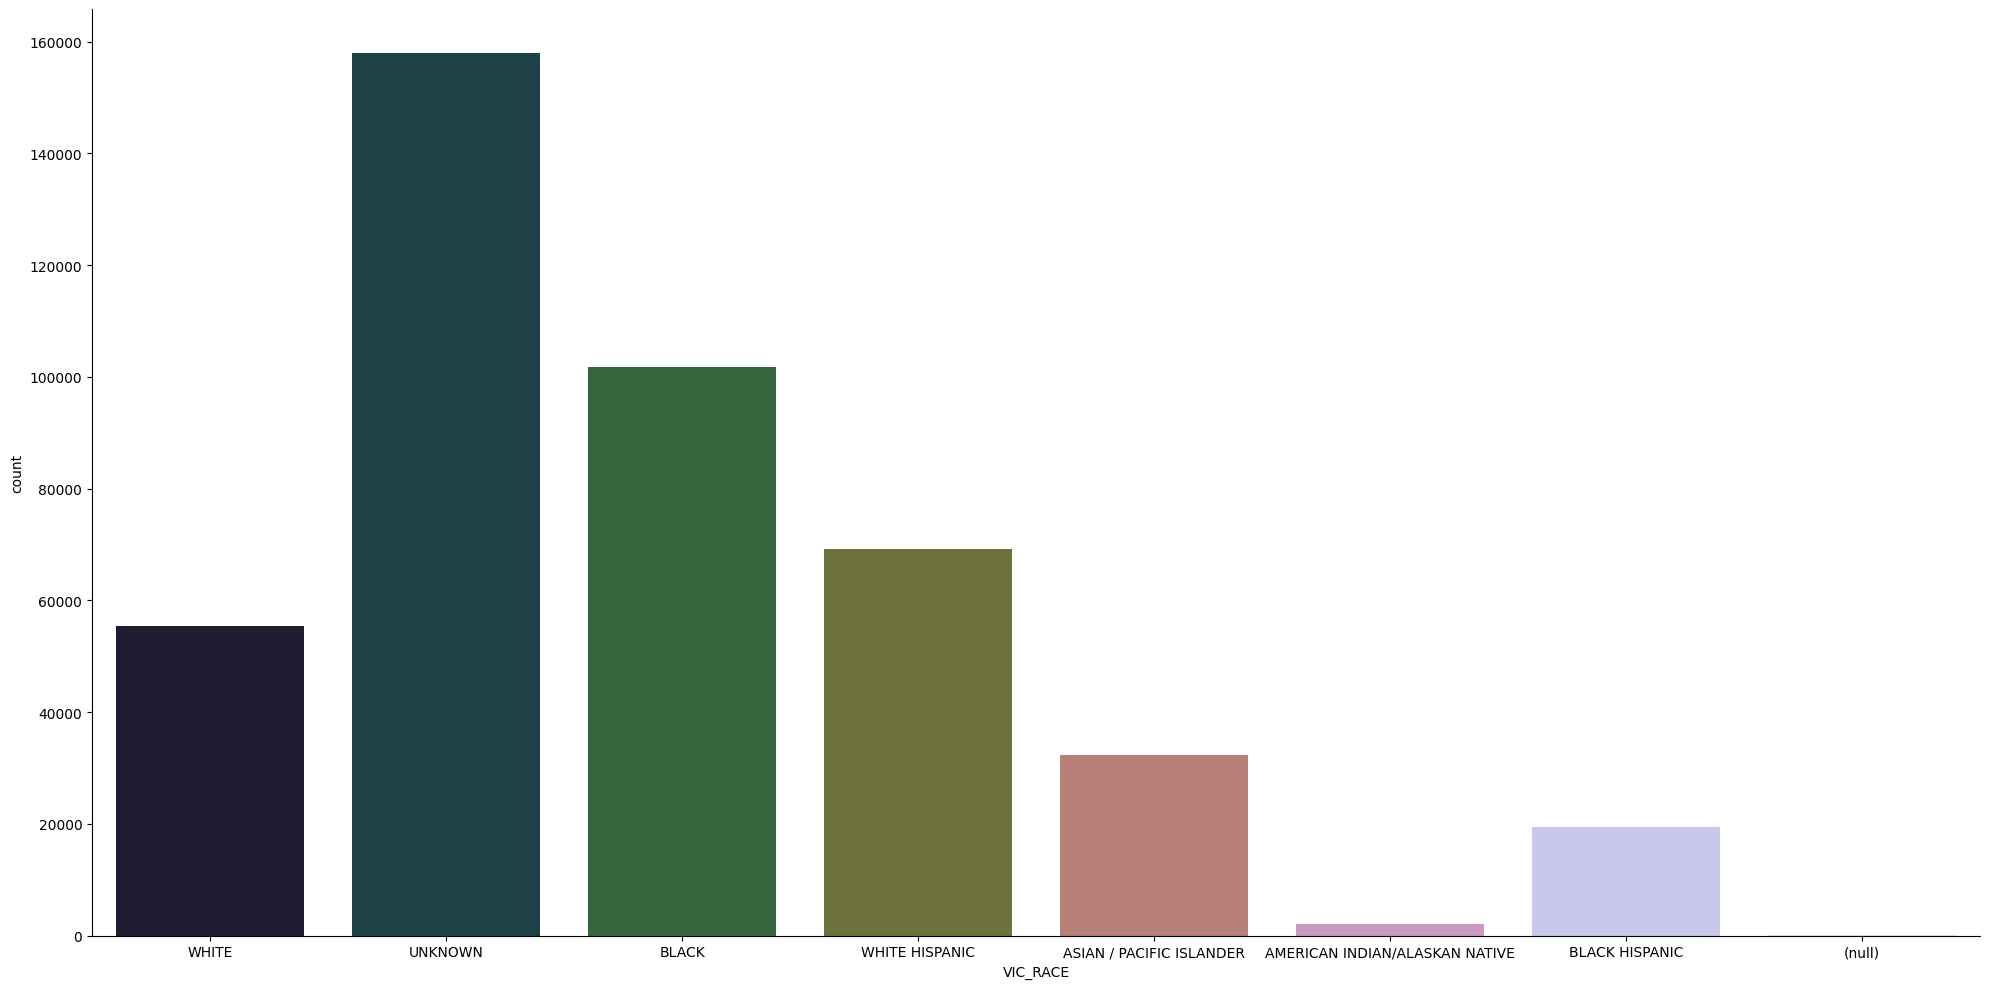

In [ ]:
#Number of victims by race

sns.catplot(x="VIC_RACE", data=data,kind="count", palette="cubehelix", height=10, aspect=2);

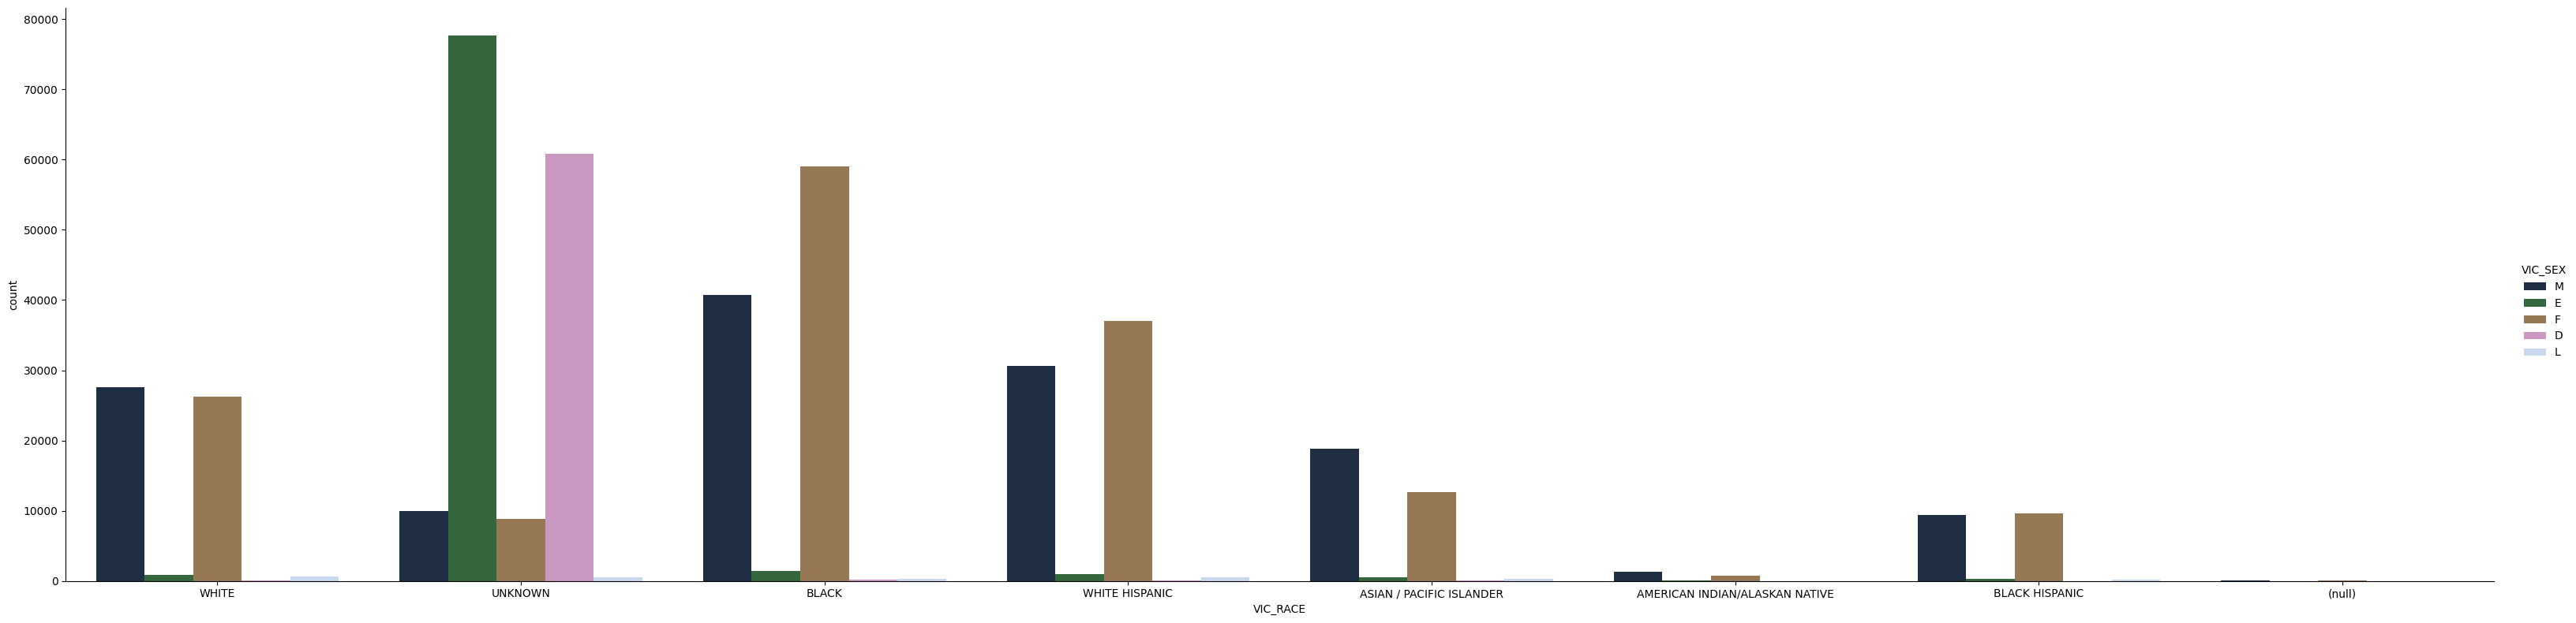

In [ ]:
ax = sns.catplot(x="VIC_RACE", hue="VIC_SEX", kind="count",palette="cubehelix", data=data, height=8, aspect=4)


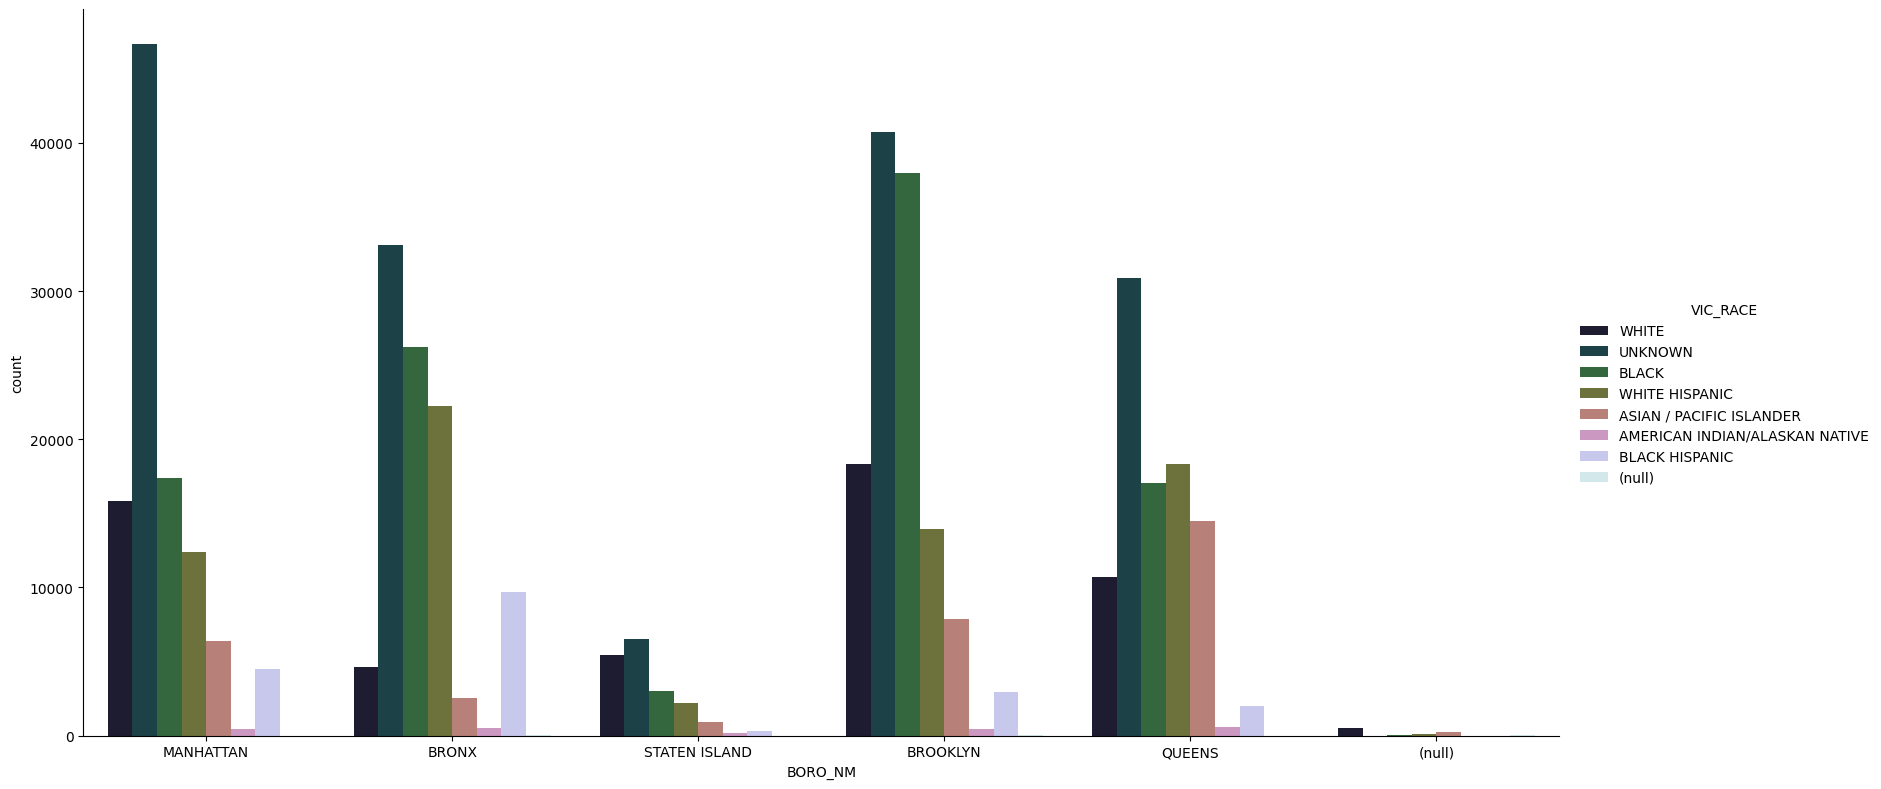

In [ ]:
#Number of victims by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="VIC_RACE", kind="count",palette="cubehelix", data=data, height=8, aspect = 2)


**Suspects PLots**

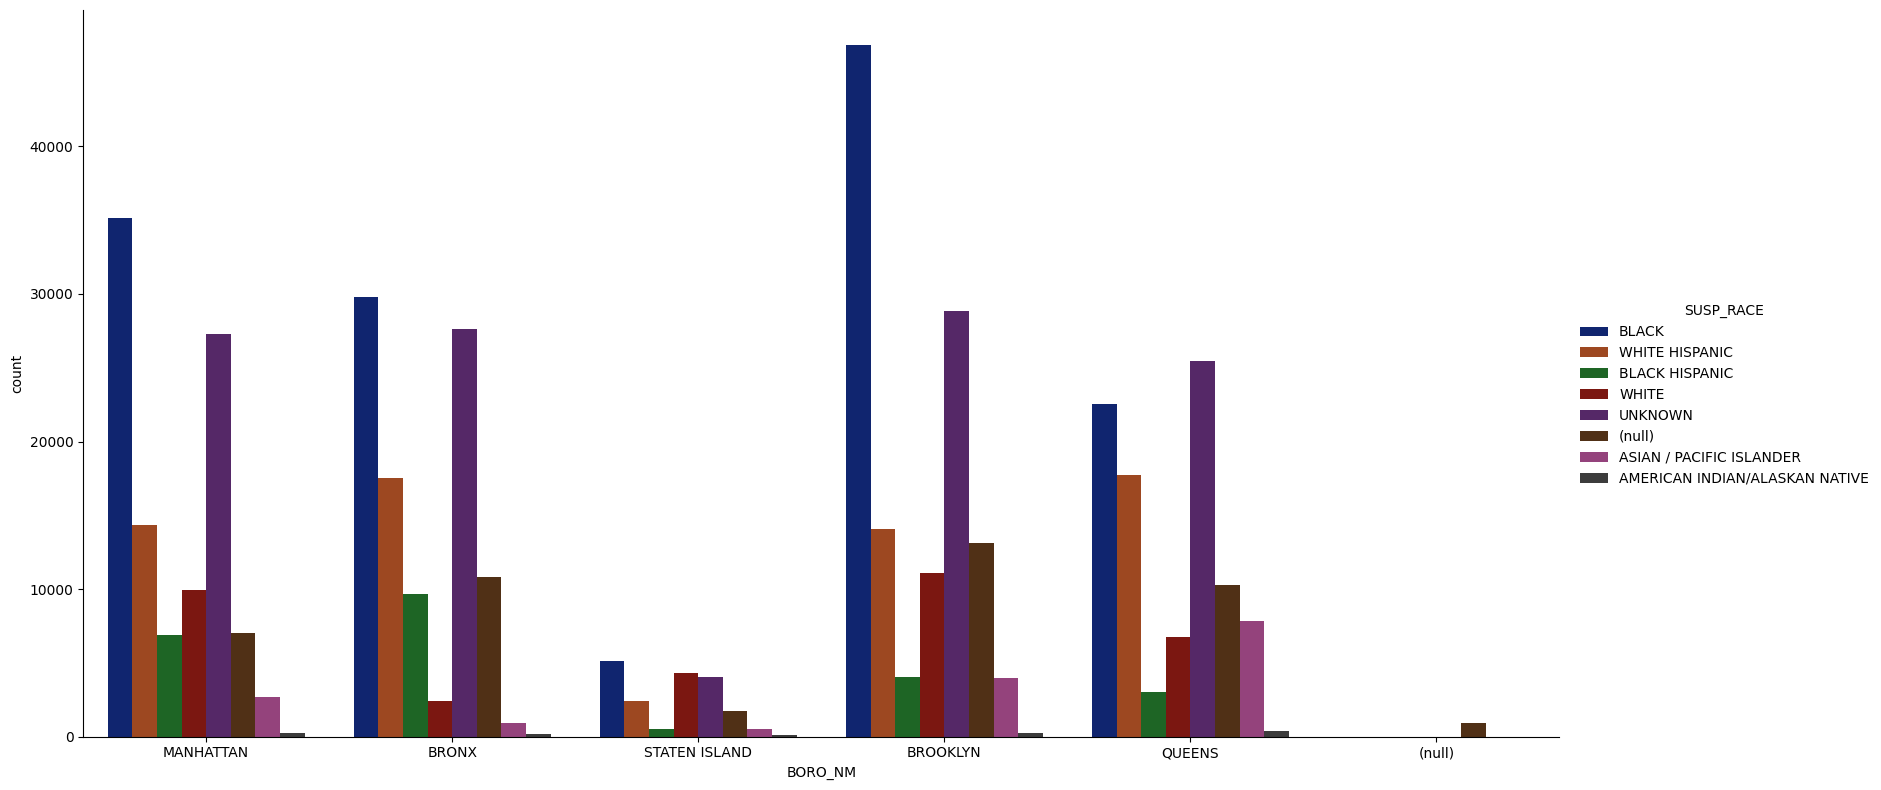

In [ ]:
#Number of Suspects by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="SUSP_RACE", kind="count",palette="dark", data=data, height=8, aspect = 2)


<Figure size 1600x800 with 0 Axes>

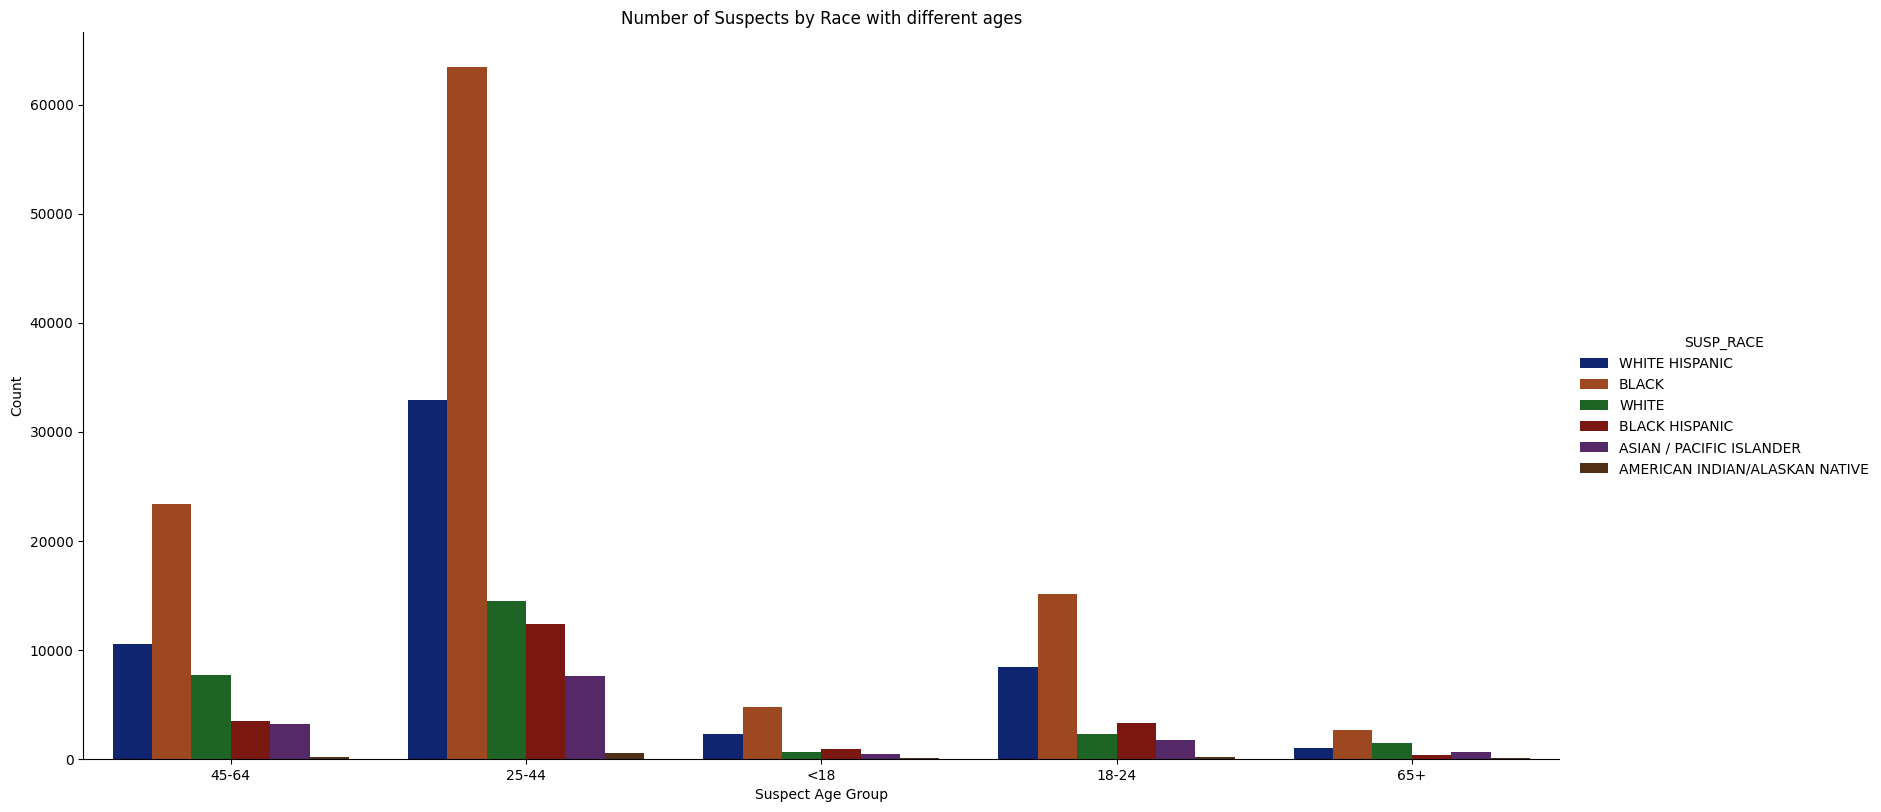

In [ ]:
# Filter out rows with SUSP_AGE_GROUP == 'UNKNOWN' or SUSP_RACE == 'UNKNOWN'
filtered_data = data[(data['SUSP_AGE_GROUP'] != 'UNKNOWN') & (data['SUSP_RACE'] != 'UNKNOWN')]

# Number of suspects by Race in the different boroughs
plt.figure(figsize=(16, 8))
ax = sns.catplot(x="SUSP_AGE_GROUP", hue="SUSP_RACE", kind="count", palette="dark", data=filtered_data, height=8, aspect=2)

# Set plot labels and title
ax.set_axis_labels("Suspect Age Group", "Count")
ax.set(title="Number of Suspects by Race with different ages")

# Show the plot
plt.show()


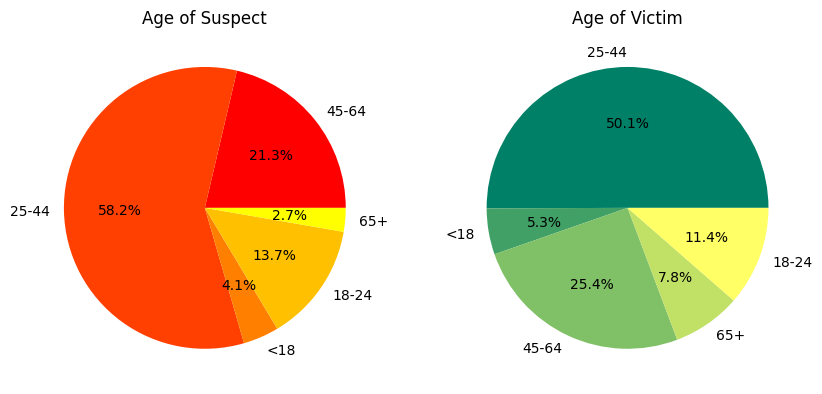

In [ ]:
filtered_data_susp = data[data['SUSP_AGE_GROUP'] != 'UNKNOWN']
filtered_data_vic = data[data['VIC_AGE_GROUP'] != 'UNKNOWN']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Age of suspect
filtered_data_susp['SUSP_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Suspect',
                                                                   colormap='autumn', autopct='%1.1f%%', ylabel='', ax=axs[0])

# Plot for Age of victim
filtered_data_vic['VIC_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Victim',
                                                                 colormap='summer', autopct='%1.1f%%', ylabel='', ax=axs[1])

plt.show()

**Crimes Plots**

Text(0.5, 1.0, 'crime success rate')

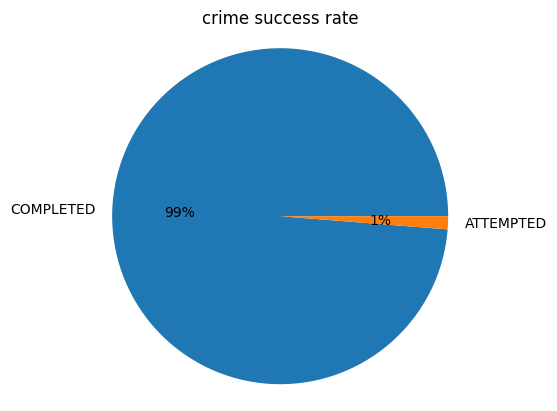

In [ ]:
# Successful crime rate
plt.pie(data['COMPLETED'].value_counts(normalize=True).round(4),labels=data['COMPLETED'].unique(),autopct='%.0f%%')
plt.axis('equal')
plt.title('crime success rate')

array([<Axes: ylabel='count'>], dtype=object)

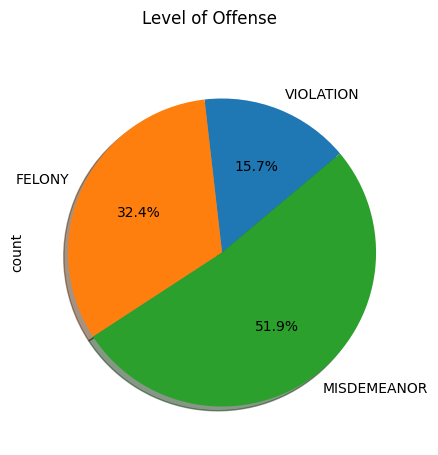

In [ ]:
data['CRIME_CLASS'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

/tmp/ipython-input-3863479351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")


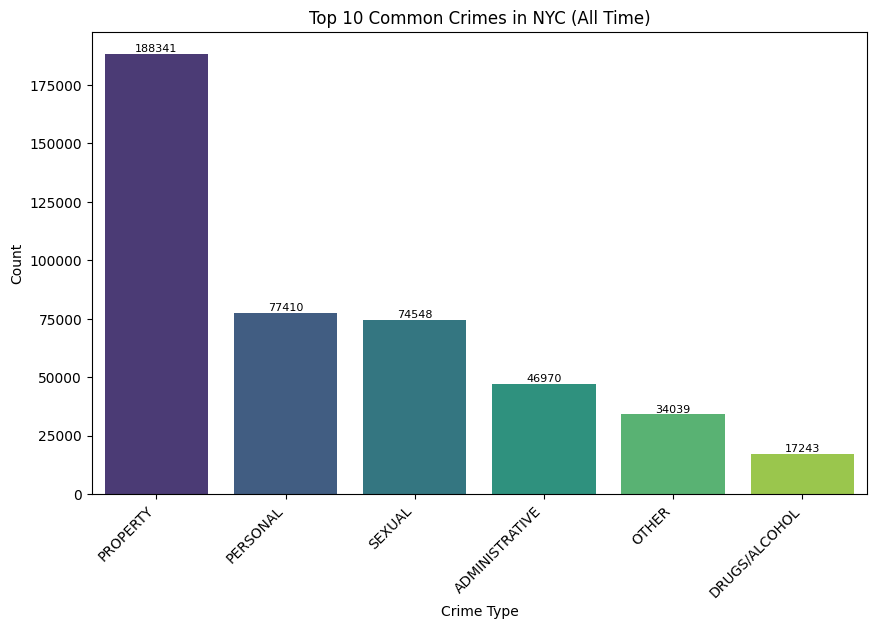

In [ ]:
# Get the top 10 common crimes
top_crimes = data['OFNS_DESC'].value_counts()[:10]

# Plotting with Seaborn for better aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")

# Adding labels and title
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Top 10 Common Crimes in NYC (All Time)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adding count values on top of each bar
for i, value in enumerate(top_crimes.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

**Locations of the Occurred Crimes**

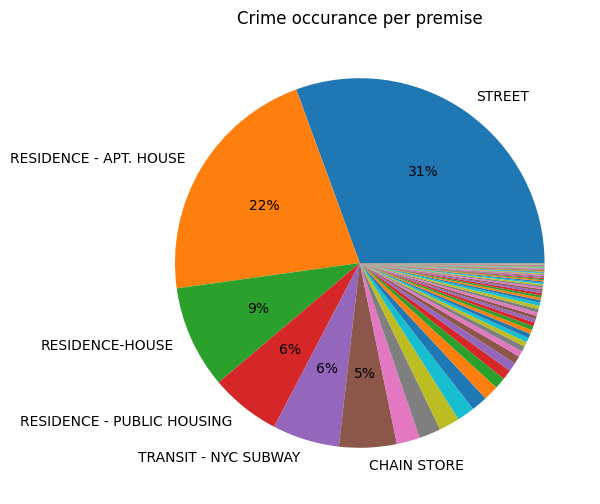

In [ ]:
# Crime premise occurance
# Cutoff percentage for display
pct_cutoff=5
fig= plt.figure(figsize=(15,6))

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


df_temp=data['PREM_TYP_DESC'].value_counts(normalize=True).round(8)

# Define lables to go with the pie plot
labels = [n if v > pct_cutoff/100 else ''
          for n, v in zip(df_temp.index, df_temp)]

# Generate the pie plot
plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=False)

# Set axis,label and title

plt.title('Crime occurance per premise')

plt.show()

**HEATMAP FROM NYC**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 438551 entries, 0 to 438555
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CMPLNT_NUM         438551 non-null  object
 1   year               438551 non-null  int32 
 2   month              438551 non-null  int32 
 3   day                438551 non-null  int32 
 4   weekday            438551 non-null  object
 5   hour               438551 non-null  int32 
 6   Latitude           438551 non-null  object
 7   Longitude          438551 non-null  object
 8   COMPLETED          438551 non-null  object
 9   OFNS_DESC          438551 non-null  object
 10  ADDR_PCT_CD        438551 non-null  int64 
 11  CRIME_CLASS        438551 non-null  object
 12  BORO_NM            438551 non-null  object
 13  PREM_TYP_DESC      438551 non-null  object
 14  OCCURENCE          438551 non-null  object
 15  JURIS_DESC         438551 non-null  object
 16  JURISDICTION_CODE  438551

In [ ]:
data['Longitude']

,Longitude
0,"-73,98327259815"
1,0
2,"-73,84727175776"
3,"-74,16344"
4,"-74,141958"
...,...
438551,"-74,169839"
438552,"-74,116753"
438553,"-74,129458"
438554,"-74,149218"


In [ ]:
data['Latitude'] = (
    data['Latitude']
    .astype(str)
    .str.replace(',', '.', regex=False)
)

data['Longitude'] = (
    data['Longitude']
    .astype(str)
    .str.replace(',', '.', regex=False)
)


In [ ]:
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='raise')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='raise')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 438551 entries, 0 to 438555
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         438551 non-null  object 
 1   year               438551 non-null  int32  
 2   month              438551 non-null  int32  
 3   day                438551 non-null  int32  
 4   weekday            438551 non-null  object 
 5   hour               438551 non-null  int32  
 6   Latitude           438551 non-null  float64
 7   Longitude          438551 non-null  float64
 8   COMPLETED          438551 non-null  object 
 9   OFNS_DESC          438551 non-null  object 
 10  ADDR_PCT_CD        438551 non-null  int64  
 11  CRIME_CLASS        438551 non-null  object 
 12  BORO_NM            438551 non-null  object 
 13  PREM_TYP_DESC      438551 non-null  object 
 14  OCCURENCE          438551 non-null  object 
 15  JURIS_DESC         438551 non-null  object 
 16  JURISDI

In [ ]:
#Creation of Heatmap

# Combine Latitude and Longitude into positions
positions = list(zip(data['Latitude'], data['Longitude']))

# Choose the map tiles (e.g., 'Stamen Terrain')
tiles = 'Stamen Terrain'

# Create a Folium Map with attribution
heatmap_map = folium.Map(
    location=[40.75, -73.98],
    zoom_start=10,
    control_scale=True  # This adds a scale to the map
)

# Add a base map layer
TileLayer(tiles=tiles, attr="Map data © Stamen Design, OpenStreetMap contributors").add_to(heatmap_map)

# Sample a subset of positions (e.g., 22,000 points)
sampled_positions = sample(positions, 22000)

# Add HeatMap layer to the Folium Map
HeatMap(sampled_positions, radius=8).add_to(heatmap_map)

# Display the Folium Map
heatmap_map

**WHEN the incidents had happened**

Text(0.5, 1.0, 'Crimes per month')

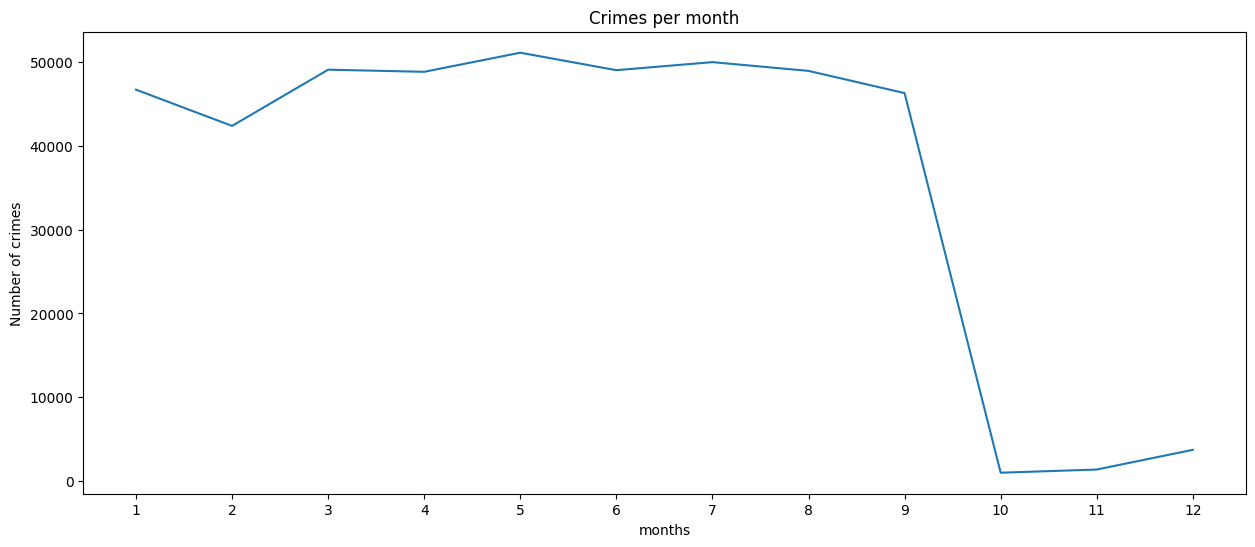

In [ ]:
# Crime distribution per month
fig= plt.figure(figsize=(15,6))
data.groupby('month').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('months')
plt.xticks([x for x in range(1,13)])
plt.ylabel('Number of crimes')
plt.title('Crimes per month')

Text(0.5, 1.0, 'Crimes per week days')

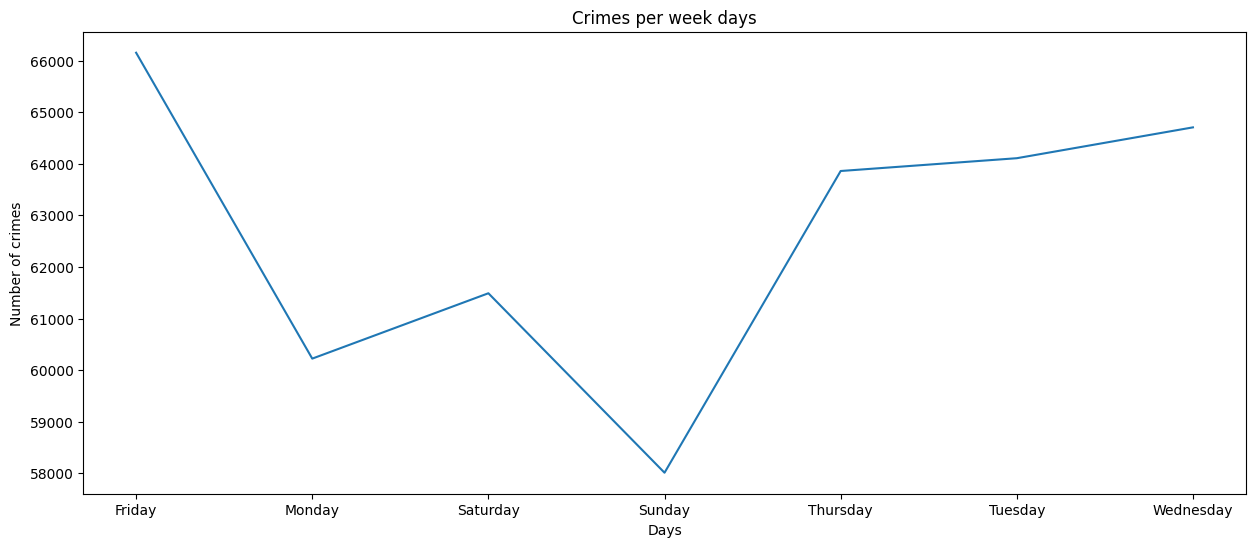

In [ ]:
# Crime distribution per week days
fig= plt.figure(figsize=(15,6))
data.groupby('weekday').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('Days')
plt.xticks([x for x in range(7)])
plt.ylabel('Number of crimes')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Crimes per week days')

Text(0.5, 1.0, 'Crimes per hour')

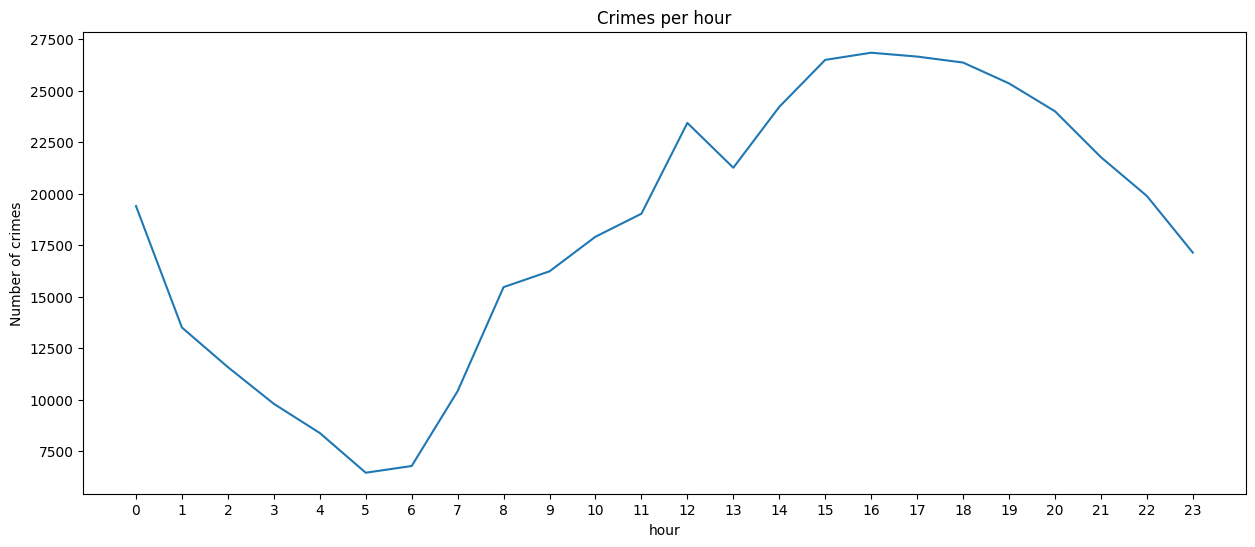

In [ ]:
# Crime distribution per hour
fig= plt.figure(figsize=(15,6))
data.groupby('hour').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('hour')
plt.xticks([x for x in range(24)])
plt.ylabel('Number of crimes')
plt.title('Crimes per hour')

**Crimes evolution in last years**

Text(0.5, 1.0, 'Crime evolution')

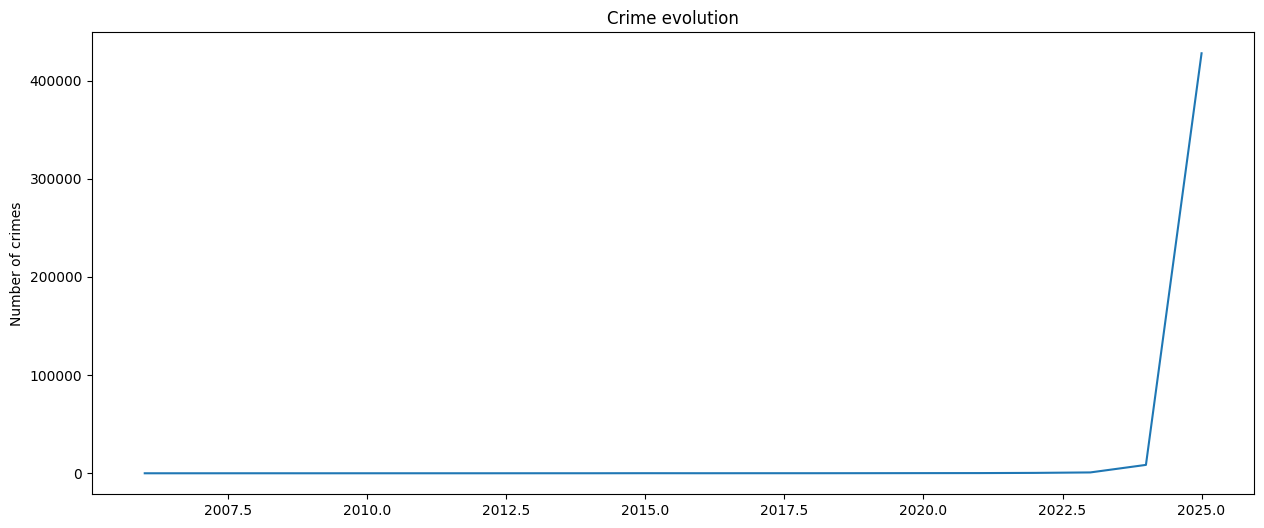

In [ ]:
# Crime distribution per year
fig= plt.figure(figsize=(15,6))
temp_df = data[data["year"]>2005]
temp_df.groupby('year').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('')
plt.ylabel('Number of crimes')
plt.title('Crime evolution')

****Reducing Memory usage****

In [ ]:
def convert_object_to_category(df):
    for column in df.select_dtypes(include='object').columns:
        df[column] = df[column].astype('category')
    return df

data = convert_object_to_category(data)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438551 entries, 0 to 438555
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CMPLNT_NUM         438551 non-null  category
 1   year               438551 non-null  int32   
 2   month              438551 non-null  int32   
 3   day                438551 non-null  int32   
 4   weekday            438551 non-null  category
 5   hour               438551 non-null  int32   
 6   Latitude           438551 non-null  float64 
 7   Longitude          438551 non-null  float64 
 8   COMPLETED          438551 non-null  category
 9   OFNS_DESC          438551 non-null  category
 10  ADDR_PCT_CD        438551 non-null  int64   
 11  CRIME_CLASS        438551 non-null  category
 12  BORO_NM            438551 non-null  category
 13  PREM_TYP_DESC      438551 non-null  category
 14  OCCURENCE          438551 non-null  category
 15  JURIS_DESC         438551 non-null  cat

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
data = reduce_mem_usage(data)

Memory usage after optimization is: 51.68 MB
Memory usage after optimization is: 36.21 MB
Decreased by 29.9%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438551 entries, 0 to 438555
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CMPLNT_NUM         438551 non-null  category
 1   year               438551 non-null  int16   
 2   month              438551 non-null  int8    
 3   day                438551 non-null  int8    
 4   weekday            438551 non-null  category
 5   hour               438551 non-null  int8    
 6   Latitude           438551 non-null  float16 
 7   Longitude          438551 non-null  float16 
 8   COMPLETED          438551 non-null  category
 9   OFNS_DESC          438551 non-null  category
 10  ADDR_PCT_CD        438551 non-null  int8    
 11  CRIME_CLASS        438551 non-null  category
 12  BORO_NM            438551 non-null  category
 13  PREM_TYP_DESC      438551 non-null  category
 14  OCCURENCE          438551 non-null  category
 15  JURIS_DESC         438551 non-null  cat

**Saving Dataframe**

In [ ]:
data.to_csv('data.csv', index=False)
